# Imports

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
import scipy.cluster.hierarchy as hcluster
image.LOAD_TRUNCATED_IMAGES = True
from sklearn.cluster import DBSCAN

In [ ]:
model = VGG16(weights='imagenet', include_top=False)

# Loading of data

In [ ]:
# Variables
imdir=r'/content/Image Clustering'
targetdir=r"/content/op"
number_clusters = 5

# Loop over files

In [ ]:
filelist = glob.glob(os.path.join(imdir, '*.jpg'))
#filelist = list(imdir)
filelist.sort()

In [ ]:
filelist

['/content/Image Clustering/2020-02-17-17-19-15-305 - Copy - Copy - Copy - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-19-15-305 - Copy - Copy - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-19-15-305 - Copy - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-19-15-305 - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-20-39-817 - Copy - Copy - Copy - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-20-39-817 - Copy - Copy - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-20-39-817 - Copy - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-20-39-817 - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-20-56-735 - Copy - Copy - Copy - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-20-56-735 - Copy - Copy - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-20-56-735 - Copy - Copy - Copy.jpg',
 '/content/Image Clustering/2020-02-17-17-20-56-735 - Copy - Copy.jpg',
 '/content

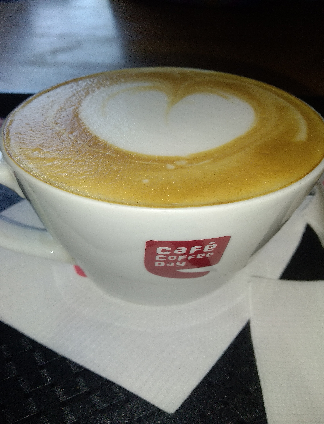

In [ ]:
img = image.load_img(filelist[19], target_size=(424, 324))
img

# Image to Array Conversion

In [ ]:
img_data = image.img_to_array(img)
print(img_data)
img_data.shape

[[[  2.   7.  29.]
  [ 25.  31.  53.]
  [ 20.  26.  48.]
  ...
  [  6.   4.   5.]
  [  7.   5.   6.]
  [  5.   5.   5.]]

 [[ 16.  22.  48.]
  [ 43.  49.  73.]
  [ 37.  44.  63.]
  ...
  [  5.   3.   4.]
  [  6.   4.   5.]
  [  4.   2.   3.]]

 [[ 40.  48.  59.]
  [ 64.  70.  82.]
  [ 42.  45.  60.]
  ...
  [  5.   3.   4.]
  [  4.   2.   3.]
  [  4.   2.   3.]]

 ...

 [[  8.   8.  10.]
  [  6.   6.   8.]
  [  6.   6.   8.]
  ...
  [154. 155. 141.]
  [156. 157. 143.]
  [157. 158. 144.]]

 [[  7.   5.   8.]
  [ 12.  10.  13.]
  [  8.   8.  10.]
  ...
  [147. 148. 134.]
  [153. 154. 138.]
  [149. 150. 136.]]

 [[  6.   4.   9.]
  [  8.   6.  11.]
  [  8.   6.   9.]
  ...
  [164. 164. 152.]
  [153. 154. 140.]
  [162. 163. 149.]]]


(424, 324, 3)

# Get features

In [ ]:
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
features = np.array(model.predict(img_data))
features

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           6.6902275 ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           8.84549   ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           4.4828095 ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           2.5114126 ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.37746757,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           5.1170616 ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [ ]:
features.shape

(1, 13, 10, 512)

In [ ]:
features = features.flatten()
features.shape

(66560,)

In [ ]:
featurelist = []
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(424, 324))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())

# Using Kmeans

In [ ]:
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist))

In [ ]:
print('Kmeans labels:', kmeans.labels_)

Kmeans labels: [4 4 4 4 1 1 1 1 3 3 3 3 0 0 0 0 2 2 2 2]


In [ ]:
for i, m in enumerate(kmeans.labels_):
    print("Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], targetdir + str(m) + "_" + str(i) + ".jpg")

# Using DBscan

In [ ]:
dbscan_model = DBSCAN(eps=0.6, min_samples=2, metric='cosine', algorithm='brute')

dbscan_model.fit(np.array(featurelist))
dbscan_labels = dbscan_model.labels_
print('DBSCAN labels:', dbscan_labels)

DBSCAN labels: [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]


In [ ]:
# Number of clusters in dbscan_labels, ignoring noise if present.
dbscan_num_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print('number of dbscan clusters:', dbscan_num_clusters_)

number of dbscan clusters: 5
